### Intalling libs

In [1]:
# pip install pydotplus

### Column description

| Variável 	| Descrição 	|
|:-:	|:-	|
|CRIM   | Taxa de crimes per capita por cidade 	|
|ZN     | Proporção de áreas residenciais zoneadas para lotes acima de 25 mil pés quadrados (aproximadamente 2.320 metros quadrados|
|INDUS  | Proporção de acres para negócios não ligados ao varejo por cidade|
|CHAS   | Variável dummy sobre Rio Charles (1 se a região faz fronteira com rio; 0 caso contrário)|
|NOX    | Concentração de óxidos nítricos (partes por 0 milhões)|
|RM     | Número médio de cômodos por habitação|
|AGE    | Proporção de unidades ocupadas por proprietários construídas antes de 1940|
|DIS    | Distâncias ponderadas até cinco centros de empregos em Boston|
|RAD    | Índice de acessibilidade às rodovias radiais|
|TAX    | Taxa de impostos sobre o valor total da propriedade por 10 mil dólares|
|PTRATIO| Razão entre aluno-professor por cidade|
|B      | 1000(Bk - 0.63) ^ 2 em que Bk é a proporção de negros (Bk = Black) por cidade (conjunto de dados de 1978)|
|LSTAT  | Porcentagem da população com status mais baixo|
|MEDV   | Valor médio das casas ocupadas por proprietários em incrementos de 1000 dólares|


### Importing Libs

In [2]:
# dataset import
from sklearn.datasets import (
    load_boston
)

# data visualization
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt

from seaborn import (
    jointplot,
    pairplot,
    boxplot,
    heatmap
)

from yellowbrick.features import (
    Rank2D, 
    RadViz,
    FeatureImportances,
    ParallelCoordinates,
    JointPlotVisualizer,
)

from yellowbrick.classifier import (
    ConfusionMatrix
)

import dtreeviz

import pydotplus

from io import(
    StringIO
)

from IPython.display import (
    Image
)

# data manipulation
import numpy as np
import pandas as pd
from pandas.plotting import(
    radviz
)

import janitor as jn

from ydata_profiling import ProfileReport

# missing values
import missingno as msno

from sklearn.impute import (
    SimpleImputer
)

# machine learning models
from sklearn import (
    svm,
    tree,
    impute,
    ensemble,
    preprocessing,
    model_selection
)

from sklearn.utils import (
    resample
)

from sklearn.dummy import (
    DummyClassifier
)

from sklearn.model_selection import (
    train_test_split
)

from sklearn.experimental import (
    enable_iterative_imputer
)

from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.tree import (
    DecisionTreeClassifier,
    export_graphviz,
    plot_tree
)

from sklearn.neighbors import (
    KNeighborsClassifier
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.svm import (
    SVC
)

from sklearn.ensemble import (
    RandomForestClassifier
)

from imblearn.over_sampling import (
    RandomOverSampler,
)

from sklearn.dummy import (
    DummyRegressor
)

import shap

import rfpimp

import lightgbm as lgb

import xgboost as xgb

import xgbfir

# data model metrics
from lime import (
    lime_tabular
)

from treeinterpreter import (
    treeinterpreter as ti
)

from sklearn.metrics import (
    auc,
    f1_score,
    roc_curve,
    recall_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    confusion_matrix,
    average_precision_score
)

import scikitplot as skplt

from yellowbrick.classifier import (
    ROCAUC,
    ClassBalance,
    ConfusionMatrix,
    ClassPredictionError,
    ClassificationReport,
    PrecisionRecallCurve,
    DiscriminationThreshold,
)

from yellowbrick.model_selection import (
    LearningCurve,
    ValidationCurve,
)

# data prep-model
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    learning_curve
)

# model deploy
import pickle

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
/User

### Regression
**Regression** is a supervised machine learning process. It is similar to classification, but instead of predicting a label (target), it tries to predict a continuous (numeric) value.<br><br>
The fact is that **sklearn** is capable of applying many of the same **classification** models to **regression** problems. In effect, the API is the same and calls *.fit*, *.score*, and *.predict*.<br><br>
For the **regression**, we will use a Boston housing dataset.

### Reading the Boston Housing Dataset

In [3]:
# loading boston dataset
b = load_boston()

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

### Preparing the dataset

In [4]:
# creating X dataset
bos_X = pd.DataFrame(b.data, columns=b.feature_names)

# creating y dataset
bos_y = b.target

# train_test_split dataset
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42
)

bos_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Preparing the standardized dataset

In [5]:
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)

bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y, test_size=0.3,
    random_state=42
)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

### Base model
A basic regression model can give us something against which we can compare other models.<br><br>
No **skear**, the default result of the *.score()* method is the *coefficient of determination* (*r2 or R2*). This number explains the percentage of variation in the input data captured by the forecast. In general, the value will be between 0 and 1, but may be negative in the case of particularly dilapidated models.<br><br>
The default strategy of *DummyRegressor* is to predict the average value of the training set.

In [6]:
dr = DummyRegressor()

dr.fit(bos_X_train, bos_y_train)

dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

### Linear regression
A simple **linear regression** tries to adapt the formula *y = mx + b*, while minimizing the square of errors. When applied, we have an *intercept* and a *coefficient*. <br><br>
The *intercept* provides a base value for a prediction, modified by the sum of the product between the coefficient and the input data. This format can be generalized to larger dimensions. In this case, each attribute will have a coefficient. The higher the absolute value of the coefficient, the more impact the attribute will have on the target.<br><br>
This model assumes that the prediction is a linear combination of the input data. For some datasets this would not be enough. More complexity can be added through attribute transformation (**sklearn**'s *preprocessing.PolynomialFeatures* transformer is capable of creating polynomial combinations of attributes). If this results in overfitting, **ridge** and **lasso** regressions can be used to regularize the estimator.<br><br>
This model is also susceptible to *heteroscedasticity*. *Heteroscedasticity* is the idea that as input values change, so does the prediction error (or residuals). Another issue that must be considered is *multicollinearity*. That is, if the columns have a high level of correlation, it will be more difficult to interpret the coefficients.

**Model Properties**<br><br>
*Efficiency in execution*
- use *n_jobs* to improve performance

*Data pre-processing*
- standardize data before doing model training

*To avoid overfitting*
- we can simplify the model by not using or adding polynomial attributes

*Interpretation of results*
- it is possible to interpret the results as weights for the contribution of the attributes, but it is assumed that the attributes have a normal distribution and are independent. You can remove collinear attributes to make interpretation easier. R2 will inform the extent to which the total variance of the result is explained by the model

In [7]:
lr = LinearRegression()

lr.fit(bos_X_train, bos_y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

LinearRegression()

In [8]:
lr.score(bos_X_test, bos_y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.7112260057484948

In [9]:
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

### Instance parameters

*n_jobs*
- number of CPUs to be used

*coef_*
- linear regression coefficients

*intercept*
- intercept of the linear model. The intercept value is the expected mean value. We can see how scaling the data affects the coefficients. The sign of the coefficients explains the direction of the relationship between the attribute and the target. A positive sign indicates that as the attribute increases, the label increases. A negative sign shows that as the attribute increases, the label decreases. The greater the absolute value of the coefficient, the greater the impact it will have

In [10]:
lr2 = LinearRegression()

lr2.fit(bos_sX_train, bos_sy_train)

LinearRegression()

In [11]:
lr2.score(bos_sX_test, bos_sy_test)

0.7112260057484927

In [12]:
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

We can use the **Yellowbrick** lib to visualize the coefficients. Since the scaled Boston data is not a **pandas** DataFrame but a **numpay** array, we need to pass the *labels* parameters if we want to use the column names.

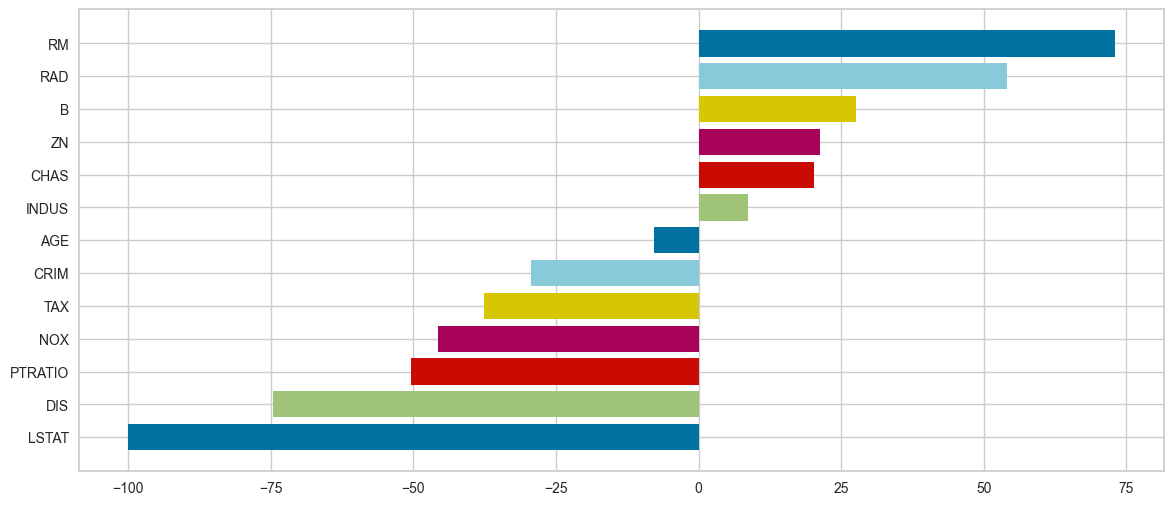

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))

fi_viz = FeatureImportances(
    lr2, labels=bos_X.columns
)

fi_viz.fit(bos_sX, bos_y)

fig.savefig("images/regression_linear_regression_boston_yellowbrick")